In [3]:
import json
import pandas as pd
import numpy as np

In [ ]:
## creating a parser class
class tagesschau_article:
    def __init__(self,path):
        """Automatically get all the important information of the article out of the JSON.

        Args:
            path (str): path to the json file
        """
        self.json_data = self.read_json(path)
        self.content = self.get_content()
        self.tags = self.get_tags()
        self.title = self.get_title()
        self.resort = self.get_ressort()
        self.type = self.get_type()
        self.content_as_list = self.get_content(True)
        
        
    def read_json(self,path):
        ## reads the json file
        with open (path,'r') as file:
            data =json.load(file)
            return data
    
    def get_content(self, as_list=False):
        """Extracts the content out of the file. You can either extract it as a list, then each block is an entry of the list, or as one big str

        Args:
            as_list (bool, optional): if you want the content in blocks or all as one str. Defaults to False.

        Returns:
            str: the content
        """
        data = self.json_data
        text = []
        for i in data['content']:
            if i['type'] =='text':
                text.append(i['value'])
        if as_list == True:
            return(text)                
        return '\n'.join(text)
    
    #def get_content_as_list(self):
        
    
    def get_tags(self):
        """Returns the tags of the article

        Returns:
            str: The tags
        """
        data = self.json_data
        tags = []
        #if 'tag' not in data.keys():
        #    return np.nan
        for i in data['tags']:
            tags.append(i['tag'])
        return tags
    def get_title(self):
        """Returns the title

        Returns:
            _type_: _description_
        """
        data = self.json_data
        if 'title' not in data.keys():
            return np.nan
        return data['title']

    def get_type(self):
        """Returns the type

        Returns:
            _type_: _description_
        """
        data = self.json_data
        if 'type' not in data.keys():
            return np.nan
        return data['type']

    def get_ressort(self):
        """Returns the ressort

        Returns:
            str: _description_
        """
        data = self.json_data
        if 'ressort' not in data.keys():
            return np.nan
        return data['ressort']
    
    
    def to_dict(self, with_singel_tags=True):
        """Converts all the attributs of the class to a dict. This can be used to make a pd.df out of it

        Args:
            with_singel_tags (bool, optional): Then the list of tags is converted also in elements of the dicts. Defaults to True.

        Returns:
            dict: _description_
        """
        id = [f'tag_{i}' for i in range(len(self.tags))]
        tag_dict = {i:t for i,t in zip(id,self.tags)}
        data_dict = {'title':self.title,'content':self.content,'content_as_list':self.content_as_list,'tags':self.tags,'ressort':self.resort,'type':self.type}
        if with_singel_tags:
            data_dict.update(tag_dict)
        return data_dict
        

In [ ]:
## Example for single article
tagesschau_article('data/-ausland-afrika-cholera-simbabwe-100.json').to_dict()

{'title': 'Cholera breitet sich in Simbabwe aus',
 'content': '<strong>Simbabwe kämpft gegen einen Cholera-Ausbruch. Seit Februar sind bereits mehr als 200 Menschen an der hochansteckenden Durchfallerkrankung gestorben, Tausende haben sich infiziert. Experten vermuten noch höhere Zahlen.</strong>\n<em>Von Karin Wehrheim, ARD Johannesburg</em>\nIn Kuwadzana, einem Vorort von Harare, fließt das Abwasser zwischen den Hütten hindurch. Es ist mit Cholera-Bakterien verseuchtes Wasser aus aufgeplatzten Abwasserrohren. Berge von Müll türmen sich an den Straßen. Das gehe schon seit Monaten so, sagt Lucia Rupende und zeigt auf Maden in den Pfützen. Ihre Kinder lässt sie deshalb nicht hinaus.\n"Das ist schrecklich. Sind wir Tiere?", fragt sie. "Es ist unerträglich, wie wir leben." Die Kinder müssten drinnen bleiben und könnten nicht draußen spielen. "Wir haben Angst, dass sie sich mit Cholera anstecken", sagt sie.\n40 Prozent der Cholera-Fälle in der Hauptstadt werden derzeit aus dem Vorort Kuwad

## Parsing all articles

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# creates empty dataframe  
all_files = os.listdir('data/')
df = pd.DataFrame(columns=['index','title','content','content_as_list','ressort','type','tag_0','tag_1','tag_2','tag_3','tag_4','tags','path'])
df.set_index('index',inplace= True)
df


,title,content,content_as_list,ressort,type,tag_0,tag_1,tag_2,tag_3,tag_4,tags,path
index,,,,,,,,,,,,


In [ ]:
## Parses all articles in the data folder
for path in all_files:
    df.loc[len(df)] = tagesschau_article('data/'+path).to_dict()
    df.at[len(df)-1,'path']= path
df

/tmp/ipykernel_9424/1498719563.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-inland-innenpolitik-ermittlungen-hackerangriff-bundesamt-kartographie-100.json' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[len(df)-1,'path']= path


,title,content,content_as_list,ressort,type,tag_0,tag_1,tag_2,tag_3,tag_4,tags,path
index,,,,,,,,,,,,
0,Berlin macht Peking für Cyberangriff verantwor...,"<strong>Lange wurde es vermutet, nun ist sich ...","[<strong>Lange wurde es vermutet, nun ist sich...",inland,story,Hackerangriff,China,Bundesamt für Kartographie,NaN,NaN,"[Hackerangriff, China, Bundesamt für Kartograp...",-inland-innenpolitik-ermittlungen-hackerangrif...
1,SPD plädiert für Wahl Reichinneks in Kontrollg...,<strong>Der Bundestag wählt heute die Mitglied...,[<strong>Der Bundestag wählt heute die Mitglie...,inland,story,Geheimdienstkontrolle,Linksfraktion,Bundestag,PKGr,Parlamentarisches Kontrollgremium,"[Geheimdienstkontrolle, Linksfraktion, Bundest...",-inland-innenpolitik-geheimdienstkontrolle-rei...
2,Proteste gegen rechtsliberale Regierung,<strong>In Argentinien haben Hunderttausende i...,[<strong>In Argentinien haben Hunderttausende ...,ausland,story,Argentinien,Protest,Milei,LGBTQ,NaN,"[Argentinien, Protest, Milei, LGBTQ]",-ausland-amerika-argentinien-proteste-milei-10...
3,Israel meldet Kontrolle über Korridor zu Ägypten,<strong>Israel hat nach eigenen Angaben im Gaz...,[<strong>Israel hat nach eigenen Angaben im Ga...,ausland,story,Gazastreifen,Israel,Nahost,NaN,NaN,"[Gazastreifen, Israel, Nahost]",-ausland-asien-gazastreifen-israel-110.json
4,Kubicki ruft zu Kampfbereitschaft auf,<strong>Beim außerordentlichen FDP-Parteitag i...,[<strong>Beim außerordentlichen FDP-Parteitag ...,inland,story,Bundestagswahl 2025,FDP,NaN,NaN,NaN,"[Bundestagswahl 2025, FDP]",-inland-bundestagswahl-fdp-sonderparteitag-100...
...,...,...,...,...,...,...,...,...,...,...,...,...
14929,ÖPNV - on demand und autonom,<strong>Lange Wege zum Supermarkt und Geldauto...,[<strong>Lange Wege zum Supermarkt und Geldaut...,wirtschaft,story,ÖPNV,Autonomes Fahren,Deutsche Bahn,NaN,NaN,"[ÖPNV, Autonomes Fahren, Deutsche Bahn]",-wirtschaft-verbraucher-bahn-kira-verkehr-100....
14930,Tod nach Narkose - Wenn Ärzte pfuschen,<strong>In den vergangenen zehn Jahren sind 21...,[<strong>In den vergangenen zehn Jahren sind 2...,investigativ,story,Arztpraxen,Narkose,Tod,NaN,NaN,"[Arztpraxen, Narkose, Tod]",-investigativ-report-mainz-arztpraxen-narkose-...
14931,Wie weit reicht das Recht auf Vergessenwerden?,"<strong>Muss Google verhindern, dass illegal v...","[<strong>Muss Google verhindern, dass illegal ...",investigativ,story,Sexualisierte Gewalt,Internetsuche,Klage,Google,NaN,"[Sexualisierte Gewalt, Internetsuche, Klage, G...",-investigativ-swr-internet-suchanfragen-privat...


In [ ]:
## the different ressorts
df['ressort'].value_counts()

ressort
ausland         6073
inland          3359
wirtschaft      3099
wissen           801
investigativ     292
faktenfinder     133
sport             15
Name: count, dtype: int64

Text(0, 0.5, 'count of articles')

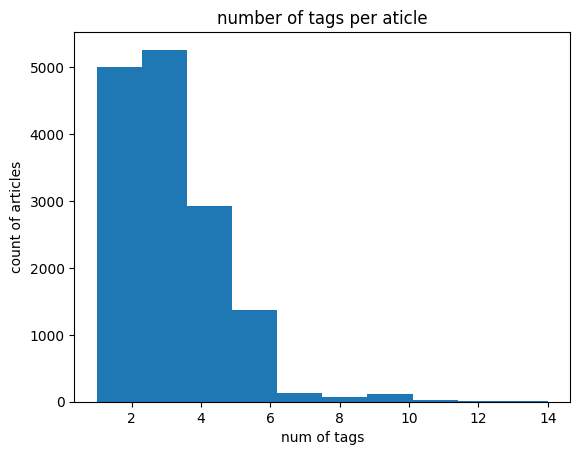

In [ ]:
## number of tags per article
num_tags =  [len(i) for i in df['tags']]
plt.hist(num_tags)
plt.title('number of tags per aticle')
plt.xlabel('num of tags')
plt.ylabel('count of articles')

Text(0, 0.5, 'count of articles')

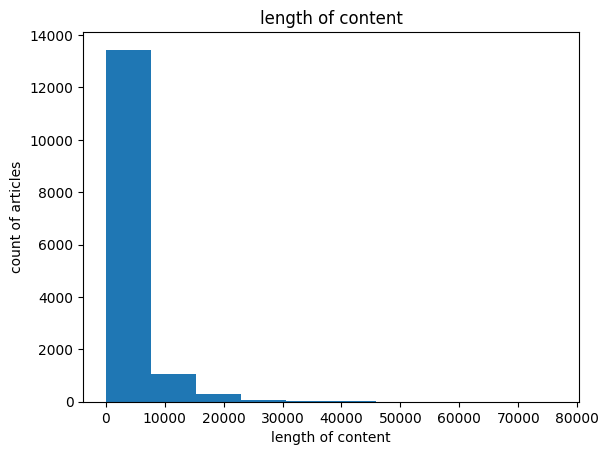

In [ ]:
## length of content per article
len_content =  [len(i) for i in df['content']]
plt.hist(len_content)
plt.title('length of content')
plt.xlabel('length of content')
plt.ylabel('count of articles')

Text(0, 0.5, 'count of articles')

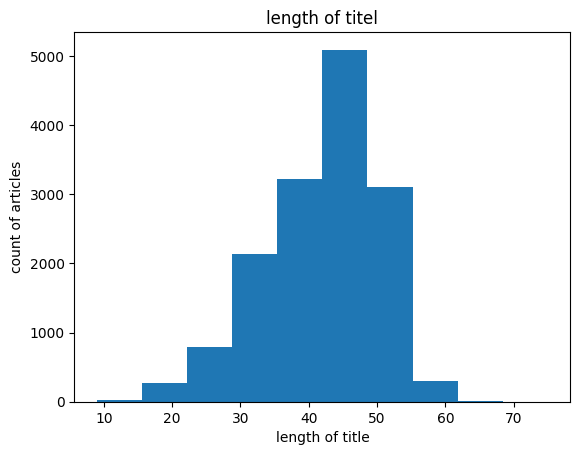

In [94]:
## length of contetn per articel
len_title =  [len(i) for i in df['title']]
plt.hist(len_title)
plt.title('length of titel')
plt.xlabel('length of title')
plt.ylabel('count of articles')

In [82]:
tag_columns = ['tag_0','tag_1','tag_2','tag_3','tag_4']
all_tags = []
for column in tag_columns:
    all_tags = all_tags + df[column].to_list()

Text(0.5, 1.0, '10 moste used tags')

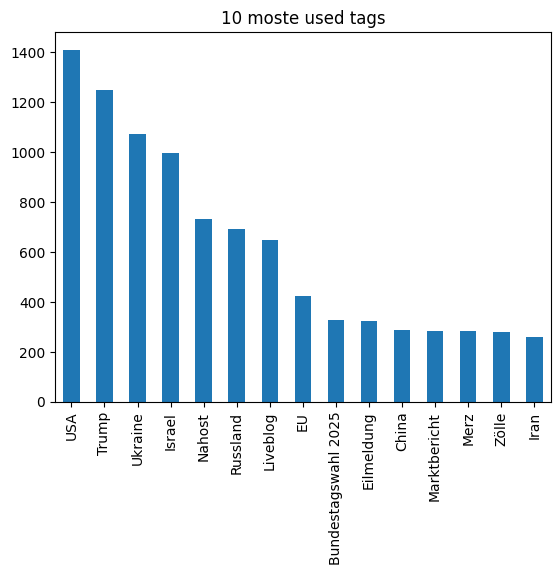

In [ ]:
## most used tags
all_tags = pd.Series(all_tags)
all_tags.value_counts()[:10].plot.bar()
plt.title('10 moste used tags')

Text(0.5, 1.0, 'articel with exact same tags')

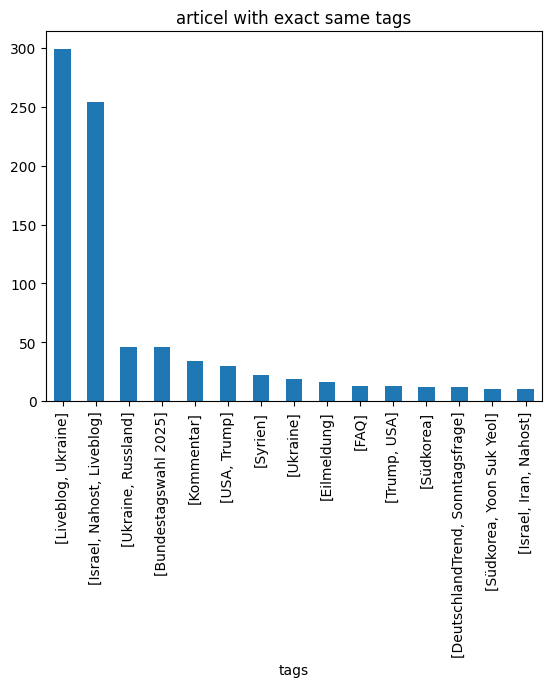

In [ ]:
## number of articles with same tags
df['tags'].value_counts()[:15].plot.bar()
plt.title('articel with exact same tags')

## Filter articles

In [16]:
filterd_df = df.copy()
filterd_df

,title,content,content_as_list,ressort,type,tag_0,tag_1,tag_2,tag_3,tag_4,tags,path
index,,,,,,,,,,,,
0,Berlin macht Peking für Cyberangriff verantwor...,"<strong>Lange wurde es vermutet, nun ist sich ...","[<strong>Lange wurde es vermutet, nun ist sich...",inland,story,Hackerangriff,China,Bundesamt für Kartographie,NaN,NaN,"[Hackerangriff, China, Bundesamt für Kartograp...",-inland-innenpolitik-ermittlungen-hackerangrif...
1,SPD plädiert für Wahl Reichinneks in Kontrollg...,<strong>Der Bundestag wählt heute die Mitglied...,[<strong>Der Bundestag wählt heute die Mitglie...,inland,story,Geheimdienstkontrolle,Linksfraktion,Bundestag,PKGr,Parlamentarisches Kontrollgremium,"[Geheimdienstkontrolle, Linksfraktion, Bundest...",-inland-innenpolitik-geheimdienstkontrolle-rei...
2,Proteste gegen rechtsliberale Regierung,<strong>In Argentinien haben Hunderttausende i...,[<strong>In Argentinien haben Hunderttausende ...,ausland,story,Argentinien,Protest,Milei,LGBTQ,NaN,"[Argentinien, Protest, Milei, LGBTQ]",-ausland-amerika-argentinien-proteste-milei-10...
3,Israel meldet Kontrolle über Korridor zu Ägypten,<strong>Israel hat nach eigenen Angaben im Gaz...,[<strong>Israel hat nach eigenen Angaben im Ga...,ausland,story,Gazastreifen,Israel,Nahost,NaN,NaN,"[Gazastreifen, Israel, Nahost]",-ausland-asien-gazastreifen-israel-110.json
4,Kubicki ruft zu Kampfbereitschaft auf,<strong>Beim außerordentlichen FDP-Parteitag i...,[<strong>Beim außerordentlichen FDP-Parteitag ...,inland,story,Bundestagswahl 2025,FDP,NaN,NaN,NaN,"[Bundestagswahl 2025, FDP]",-inland-bundestagswahl-fdp-sonderparteitag-100...
...,...,...,...,...,...,...,...,...,...,...,...,...
14929,ÖPNV - on demand und autonom,<strong>Lange Wege zum Supermarkt und Geldauto...,[<strong>Lange Wege zum Supermarkt und Geldaut...,wirtschaft,story,ÖPNV,Autonomes Fahren,Deutsche Bahn,NaN,NaN,"[ÖPNV, Autonomes Fahren, Deutsche Bahn]",-wirtschaft-verbraucher-bahn-kira-verkehr-100....
14930,Tod nach Narkose - Wenn Ärzte pfuschen,<strong>In den vergangenen zehn Jahren sind 21...,[<strong>In den vergangenen zehn Jahren sind 2...,investigativ,story,Arztpraxen,Narkose,Tod,NaN,NaN,"[Arztpraxen, Narkose, Tod]",-investigativ-report-mainz-arztpraxen-narkose-...
14931,Wie weit reicht das Recht auf Vergessenwerden?,"<strong>Muss Google verhindern, dass illegal v...","[<strong>Muss Google verhindern, dass illegal ...",investigativ,story,Sexualisierte Gewalt,Internetsuche,Klage,Google,NaN,"[Sexualisierte Gewalt, Internetsuche, Klage, G...",-investigativ-swr-internet-suchanfragen-privat...


In [17]:
## remove too long and short articles

filterd_df = filterd_df[[True if len(i) <15_000 else False for i in filterd_df['content']]]
filterd_df = filterd_df[[True if len(i) >1000 else False for i in filterd_df['content']]]

In [18]:
## remove tags
## remove all Liveblog
tags_to_remove = ['Liveblog','Kommentar','FAQ']
for tag in tags_to_remove:
    filterd_df = filterd_df[[True if tag not in i else False for i in filterd_df['tags']]]

In [19]:
tag_columns = ['tag_0','tag_1','tag_2','tag_3','tag_4']
all_tags = []
for column in tag_columns:
    all_tags = all_tags + filterd_df[column].to_list()
all_tags = pd.Series(all_tags)
top_k_tags = all_tags.value_counts()[:50].index
top_k_tags

Index(['USA', 'Trump', 'Ukraine', 'Israel', 'Russland', 'Nahost', 'EU',
       'Eilmeldung', 'Bundestagswahl 2025', 'China', 'Zölle', 'Merz', 'Iran',
       'AfD', 'SPD', 'Marktbericht', 'Syrien', 'Frankreich', 'Gaza', 'DAX',
       'Klimawandel', 'Hamas', 'Migration', 'Börse', 'Bundestag',
       'Gazastreifen', 'Türkei', 'Union', 'Bundesregierung',
       'Regierungsbildung', 'Deutschland', 'Putin', 'Elon Musk',
       'Großbritannien', 'NATO', 'Selenskyj', 'Bundeswehr', 'Inflation', 'CDU',
       'Afghanistan', 'Konjunktur', 'Polen', 'Olaf Scholz', 'KI', 'Indien',
       'Interview', 'Deutsche Bahn', 'Waffenruhe', 'Österreich', 'Italien'],
      dtype='object')

In [20]:
## has to have 2 tags
filterd_df = filterd_df[[True if len(i) >=2 else False for i in filterd_df['tags']]]

In [21]:
## has to be in top k tags

filterd_df = filterd_df[[True if len(set(tags).intersection(top_k_tags)) >= 1 else False for tags in filterd_df['tags']]]

In [22]:
filterd_df

,title,content,content_as_list,ressort,type,tag_0,tag_1,tag_2,tag_3,tag_4,tags,path
index,,,,,,,,,,,,
0,Berlin macht Peking für Cyberangriff verantwor...,"<strong>Lange wurde es vermutet, nun ist sich ...","[<strong>Lange wurde es vermutet, nun ist sich...",inland,story,Hackerangriff,China,Bundesamt für Kartographie,NaN,NaN,"[Hackerangriff, China, Bundesamt für Kartograp...",-inland-innenpolitik-ermittlungen-hackerangrif...
1,SPD plädiert für Wahl Reichinneks in Kontrollg...,<strong>Der Bundestag wählt heute die Mitglied...,[<strong>Der Bundestag wählt heute die Mitglie...,inland,story,Geheimdienstkontrolle,Linksfraktion,Bundestag,PKGr,Parlamentarisches Kontrollgremium,"[Geheimdienstkontrolle, Linksfraktion, Bundest...",-inland-innenpolitik-geheimdienstkontrolle-rei...
3,Israel meldet Kontrolle über Korridor zu Ägypten,<strong>Israel hat nach eigenen Angaben im Gaz...,[<strong>Israel hat nach eigenen Angaben im Ga...,ausland,story,Gazastreifen,Israel,Nahost,NaN,NaN,"[Gazastreifen, Israel, Nahost]",-ausland-asien-gazastreifen-israel-110.json
4,Kubicki ruft zu Kampfbereitschaft auf,<strong>Beim außerordentlichen FDP-Parteitag i...,[<strong>Beim außerordentlichen FDP-Parteitag ...,inland,story,Bundestagswahl 2025,FDP,NaN,NaN,NaN,"[Bundestagswahl 2025, FDP]",-inland-bundestagswahl-fdp-sonderparteitag-100...
5,US-Anleger meiden das Risiko,<strong>Trotz eines knappen neuen Dow-Rekords ...,[<strong>Trotz eines knappen neuen Dow-Rekords...,wirtschaft,story,Marktbericht,Finanzen,Aktien,Jackson Hole,DAX,"[Marktbericht, Finanzen, Aktien, Jackson Hole,...",-wirtschaft-finanzen-marktberichte-marktberich...
...,...,...,...,...,...,...,...,...,...,...,...,...
14924,Trump droht Nigeria mit Militäreinsatz,<strong>US-Präsident Trump hat Nigerias Regier...,[<strong>US-Präsident Trump hat Nigerias Regie...,ausland,story,Trump,Nigeria,Christen,NaN,NaN,"[Trump, Nigeria, Christen]",-ausland-amerika-trump-nigeria-drohung-100.json
14925,Noch kein Beschluss über E-Auto-Pflicht in der EU,<strong>Die EU-Kommission plant einem Medienbe...,[<strong>Die EU-Kommission plant einem Medienb...,wirtschaft,story,Verbrennerverbot,EU,E-Autos,Dienstwagen,NaN,"[Verbrennerverbot, EU, E-Autos, Dienstwagen]",-wirtschaft-technologie-eu-verbrennerverbot-di...
14927,Was wird aus dem Ziel der Kreislaufwirtschaft?,<strong>Wiederverwenden statt wegwerfen und da...,[<strong>Wiederverwenden statt wegwerfen und d...,inland,story,Kreislaufwirtschaft,Union,SPD,NaN,NaN,"[Kreislaufwirtschaft, Union, SPD]",-inland-innenpolitik-kreislaufwirtschaft-geset...


In [23]:
filterd_df.to_csv('tagesschau_filterd_articles.csv',index=False)